# Análise TelecomX
## Introdução
Nesta análise, vamos explorar os dados de churn (evasão de clientes) da
TelecomX de forma completa, utilizando Python para análise exploratória, visualização e modelagem preditiva.

1. Configuração Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")
pd.set_option("display.max_columns", None)

In [3]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [4]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
# Normalizar colunas JSON
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


In [6]:
# Concatenar em um único DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [7]:
# Codificar 'Churn' (Yes/No → 1/0)
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
# Verificar dados
print(df_final.head())
print("\nInformações do dataset:")
print(df_final.info())

   customerID  Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    0.0  Female              0     Yes        Yes       9   
1  0003-MKNFE    0.0    Male              0      No         No       9   
2  0004-TLHLJ    1.0    Male              0      No         No       4   
3  0011-IGKFF    1.0    Male              1     Yes         No      13   
4  0013-EXCHZ    1.0  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No  

### 2. Análise Exploratória Completa (EDA)
#### 2.1. Estatísticas Descritivas


In [10]:
# Estatísticas básicas
print("\nEstatísticas descritivas:")
print(df_final.describe())



Estatísticas descritivas:
             Churn  SeniorCitizen       tenure  Charges.Monthly
count  7043.000000    7267.000000  7267.000000      7267.000000
mean      0.265370       0.162653    32.346498        64.720098
std       0.441561       0.369074    24.571773        30.129572
min       0.000000       0.000000     0.000000        18.250000
25%       0.000000       0.000000     9.000000        35.425000
50%       0.000000       0.000000    29.000000        70.300000
75%       1.000000       0.000000    55.000000        89.875000
max       1.000000       1.000000    72.000000       118.750000


In [11]:
# Proporção de churn
churn_rate = df_final['Churn'].mean()
print(f"\nTaxa de Churn: {churn_rate:.2%}")


Taxa de Churn: 26.54%


In [12]:
# Variáveis categóricas vs churn
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

In [13]:
# Função para plotar relação entre variáveis categóricas e churn
def plot_categorical_churn(col):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='Churn', data=df_final, errorbar=None)
    plt.title(f'Taxa de Churn por {col}')
    plt.ylabel('Taxa de Churn')
    plt.xticks(rotation=45)
    plt.show()

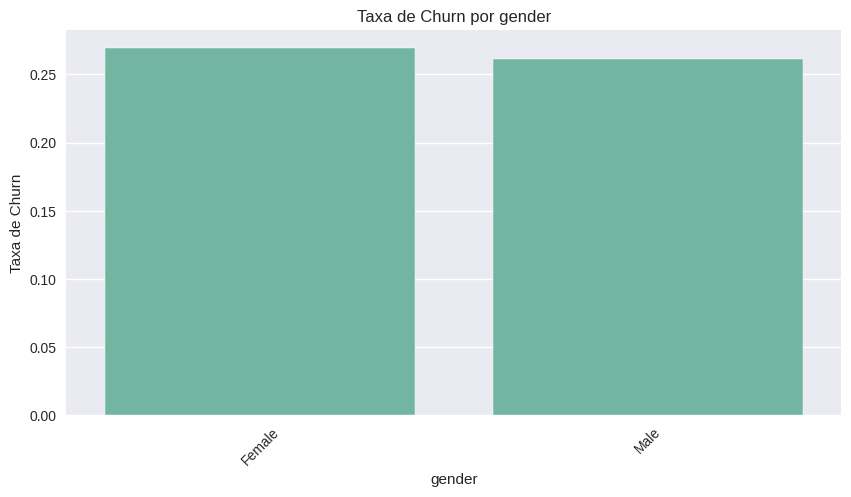

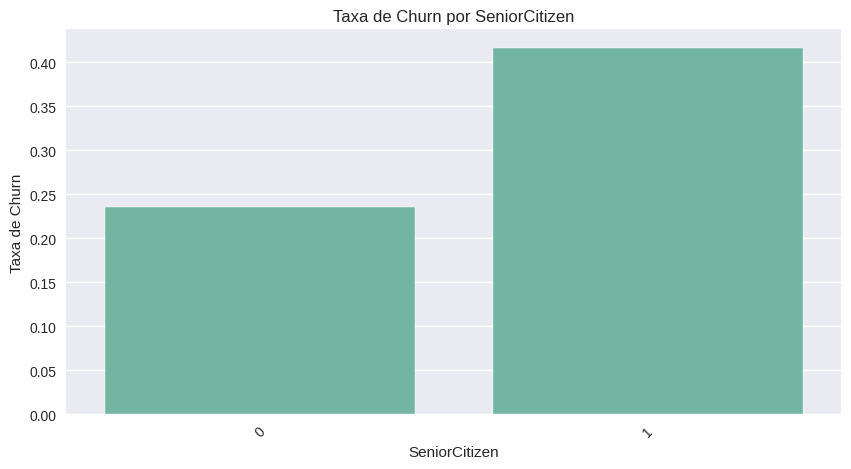

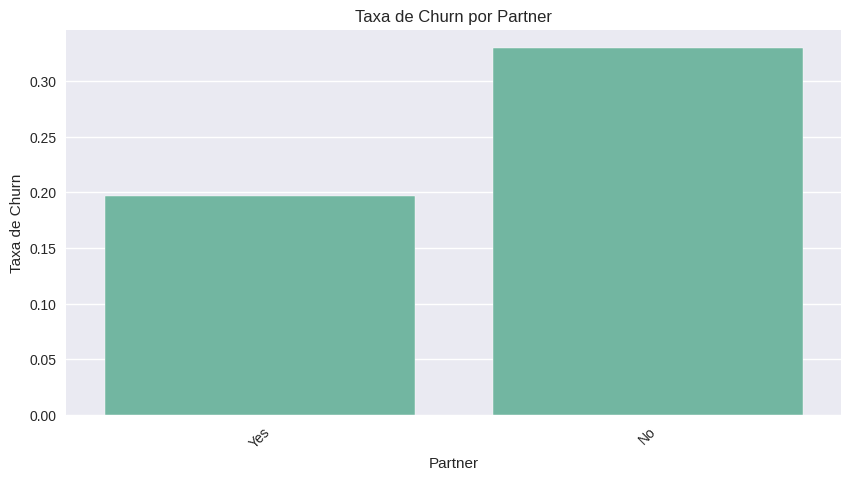

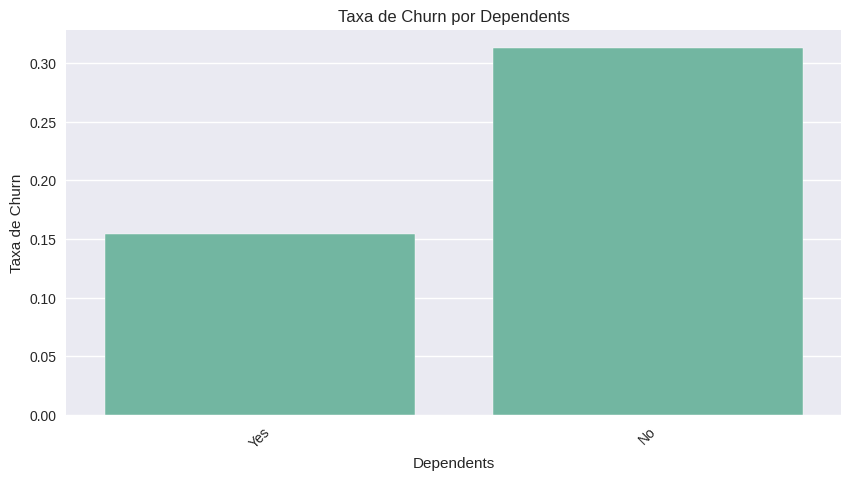

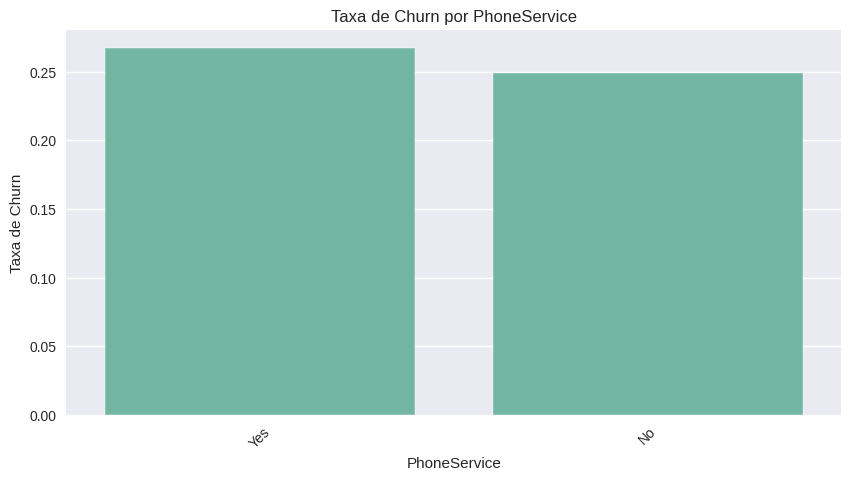

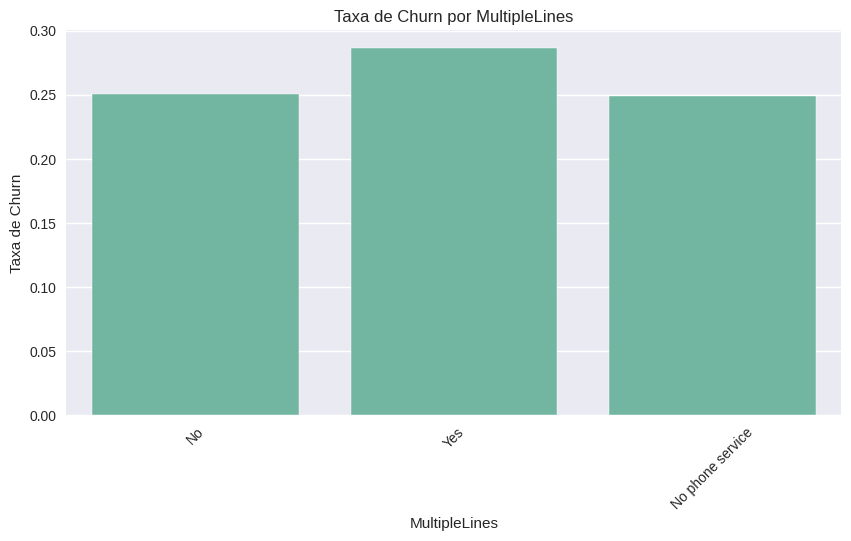

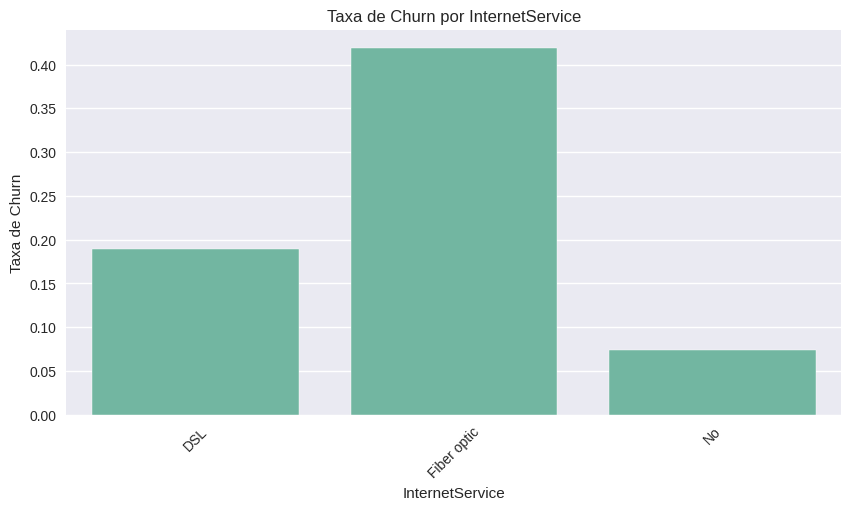

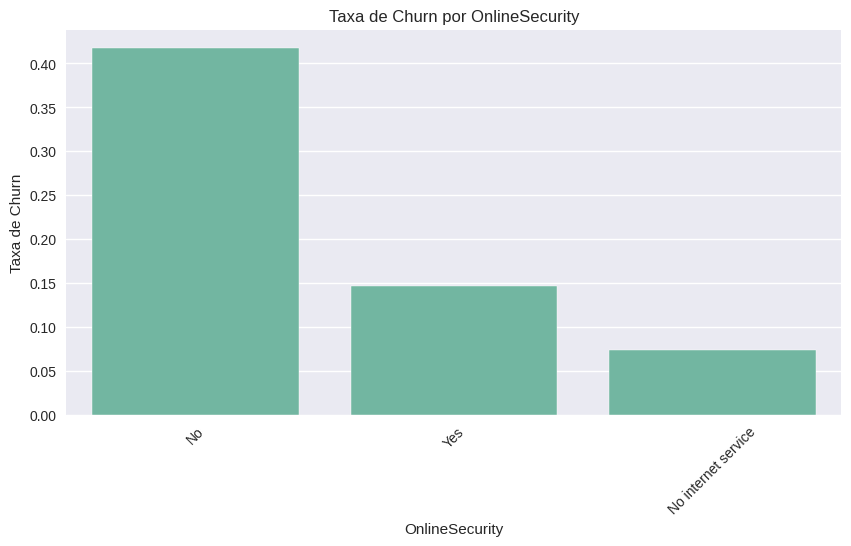

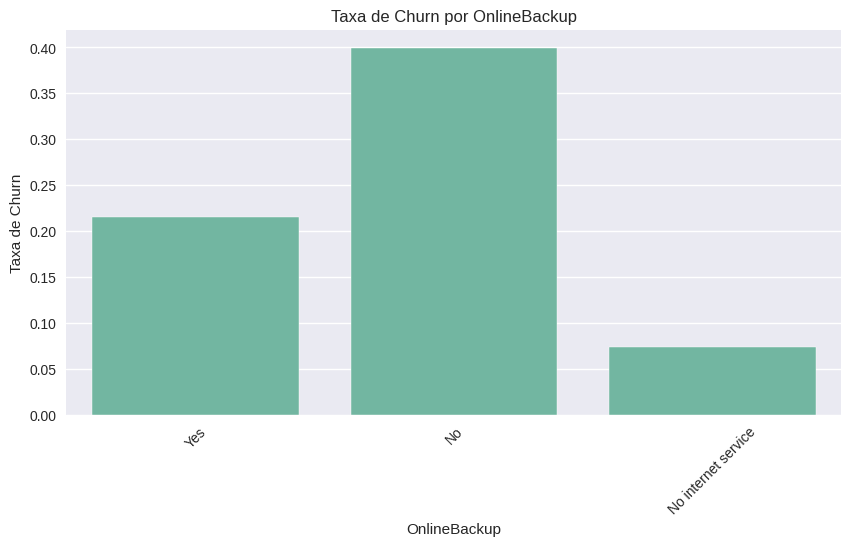

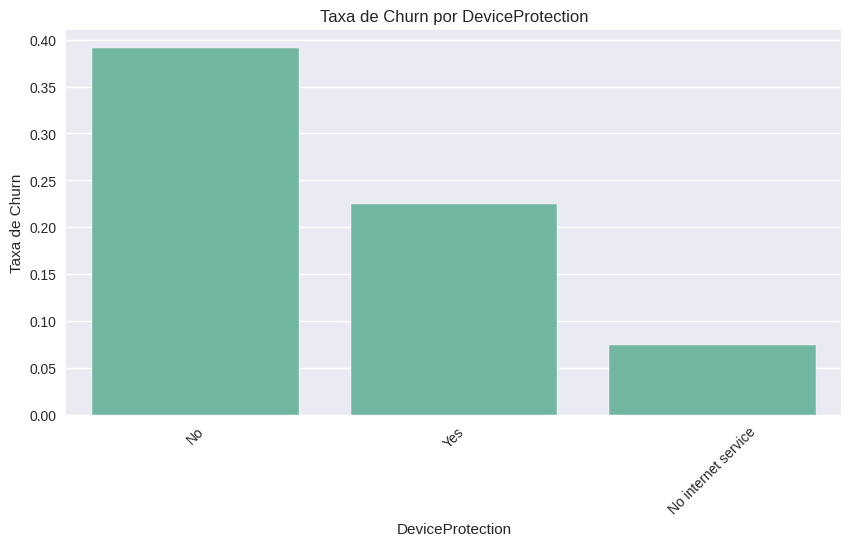

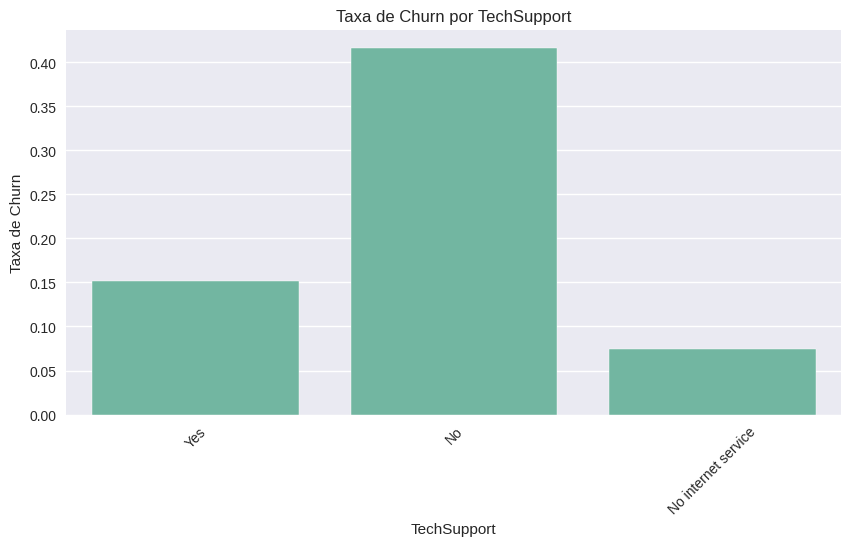

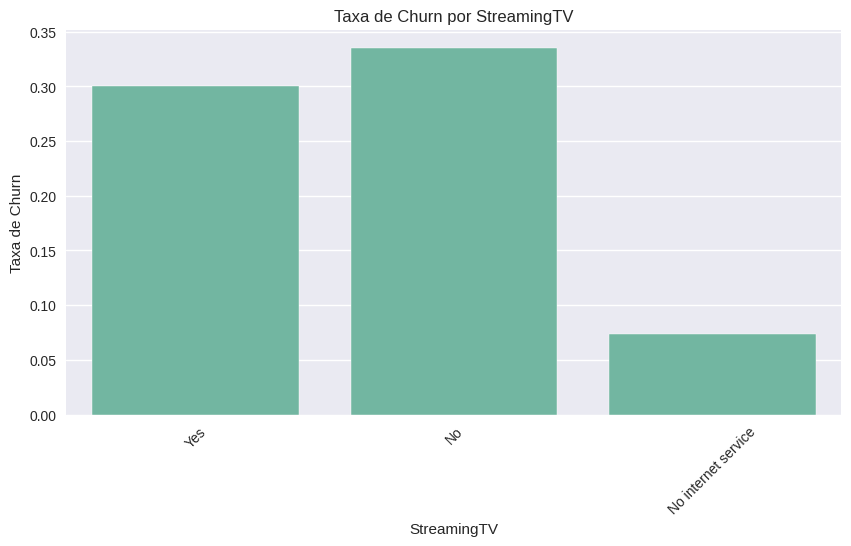

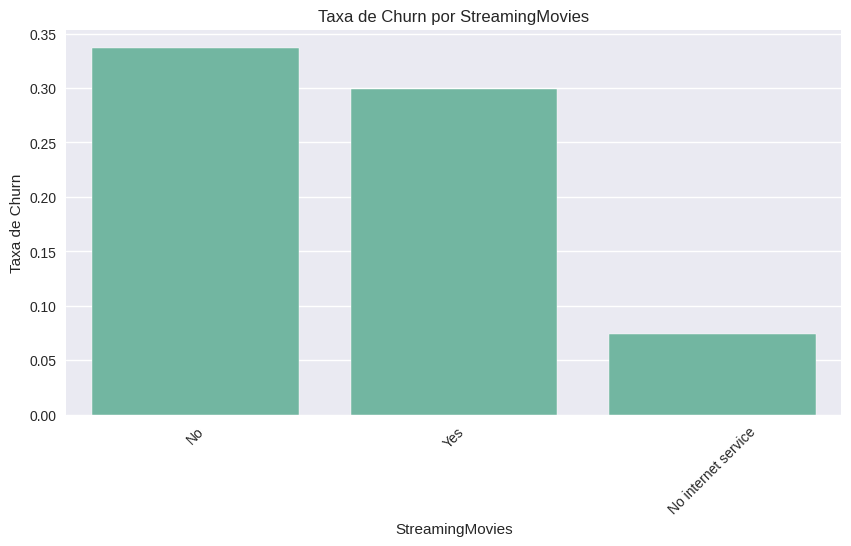

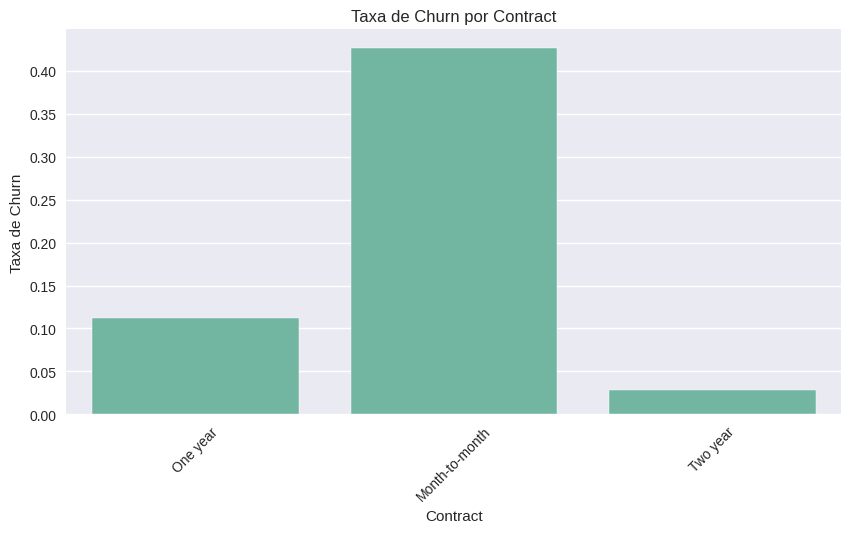

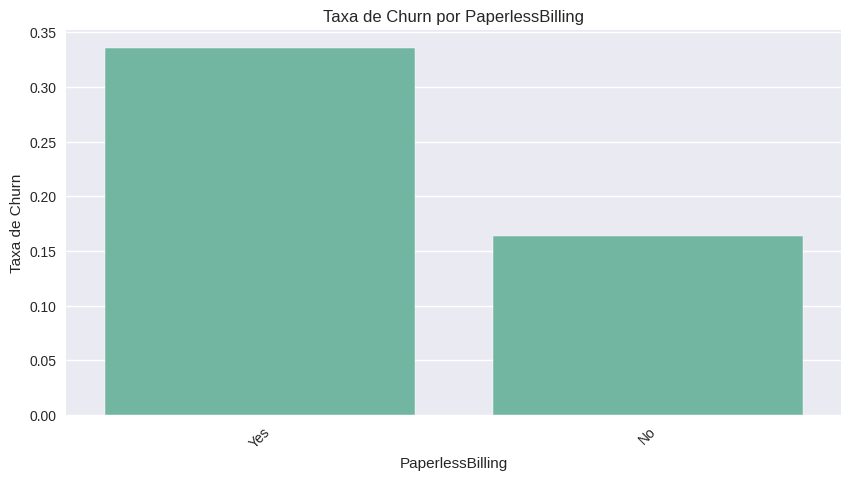

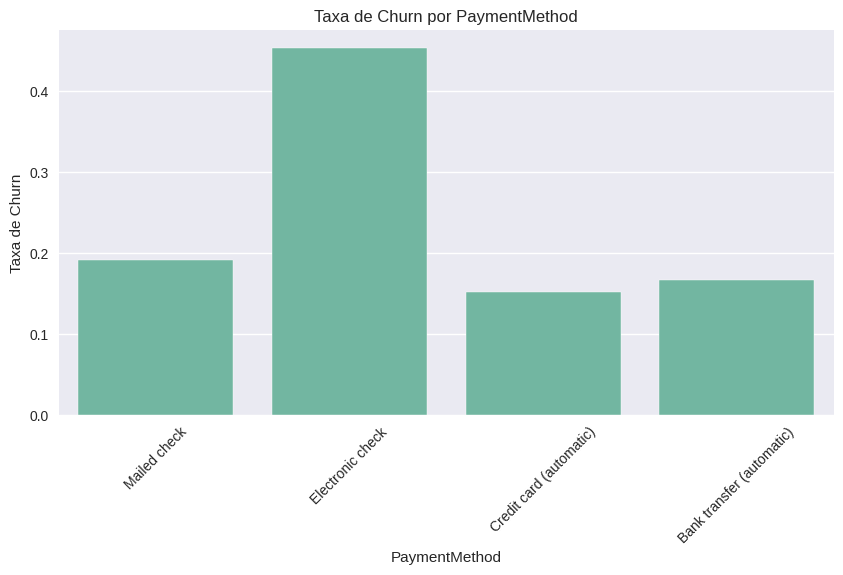

In [14]:
# Plotar para todas as variáveis categóricas
for col in categorical_cols:
    plot_categorical_churn(col)

In [15]:
print(df_final.dtypes)

customerID           object
Churn               float64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [16]:
# Conversão correta de 'Charges.Total'
df_final['Charges.Total'] = df_final['Charges.Total'].replace('[\$,]', '', regex=True)
df_final['Charges.Total'] = df_final['Charges.Total'].replace('', np.nan)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')


In [17]:
# Remove símbolos de moeda e converte vírgulas em pontos (caso existam)
df_final['Charges.Total'] = df_final['Charges.Total'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
print(df_final['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [19]:
print(df_final['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [20]:
print(df_final.dtypes)

customerID           object
Churn               float64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [21]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 2.2. Análise de Correlações

In [27]:
# Converter variáveis categóricas para análise de correlação
df_encoded = df_final.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Remove customerID as it's not a numerical feature and not relevant for correlation
df_encoded = df_encoded.drop('customerID', axis=1)

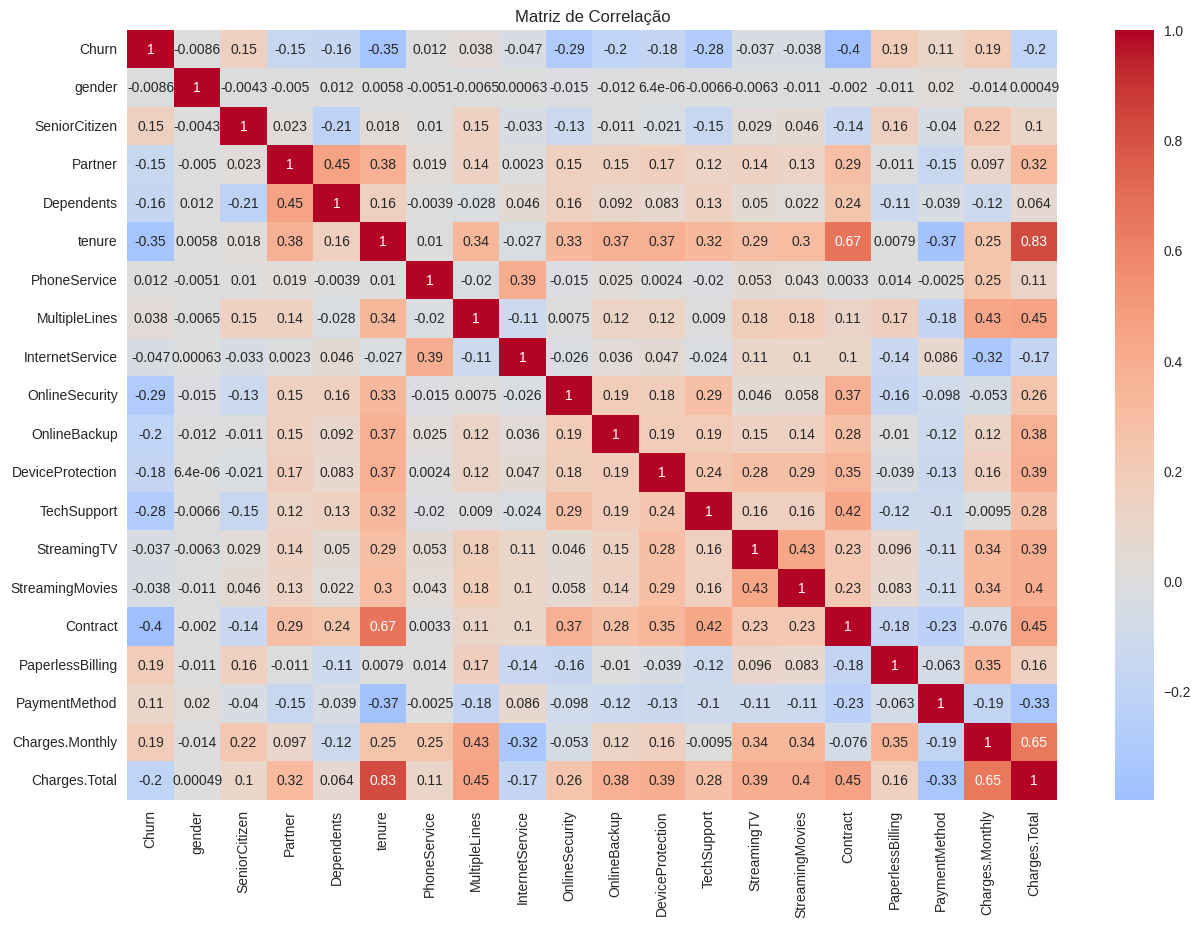

In [28]:
# Matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True, center=0)
plt.title('Matriz de Correlação')
plt.show()

In [33]:
# Verifica colunas não numéricas
non_numeric_cols = df_encoded.select_dtypes(include=['object', 'string']).columns
print("Colunas não numéricas no df_encoded:", non_numeric_cols.tolist())

Colunas não numéricas no df_encoded: []


In [29]:
# Top 10 variáveis mais correlacionadas com churn
correlations = df_encoded.corr()['Churn'].abs().sort_values(ascending=False)
print("\nTop 10 variáveis mais correlacionadas com Churn:")
print(correlations[1:11])


Top 10 variáveis mais correlacionadas com Churn:
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
Charges.Total       0.199484
OnlineBackup        0.195525
Charges.Monthly     0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
Name: Churn, dtype: float64


#### 2.3. Análise de Variáveis Numéricas

In [50]:
# Variáveis numéricas
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

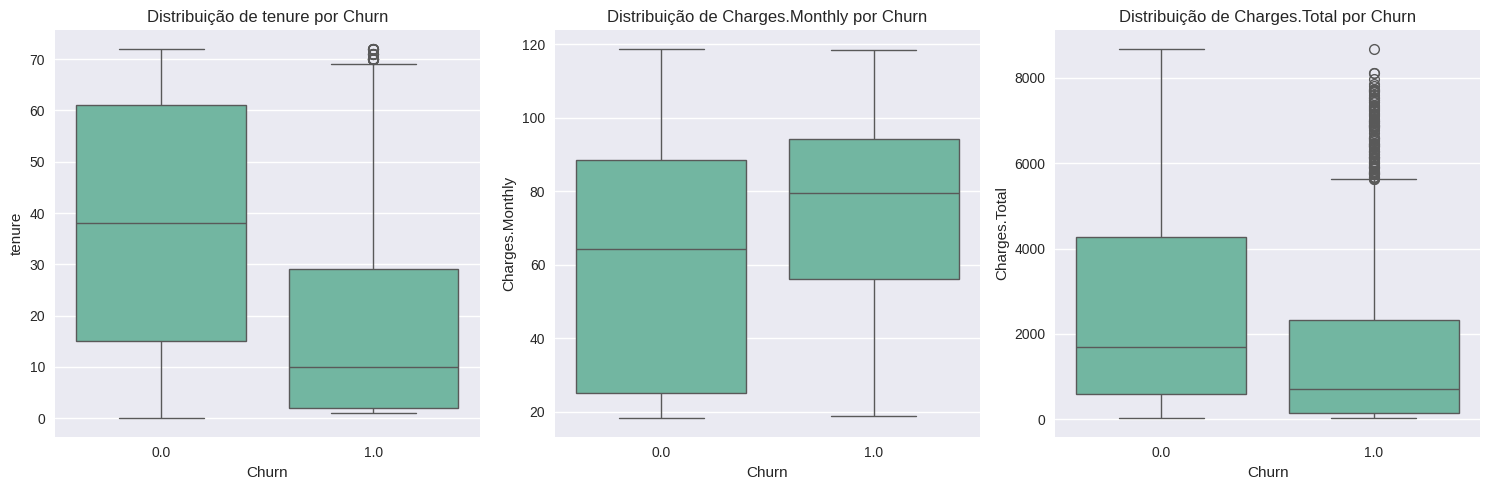

In [51]:
# Boxplot para variáveis numéricas vs churn
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df_encoded)
    plt.title(f'Distribuição de {col} por Churn')
plt.tight_layout()
plt.show()

In [52]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

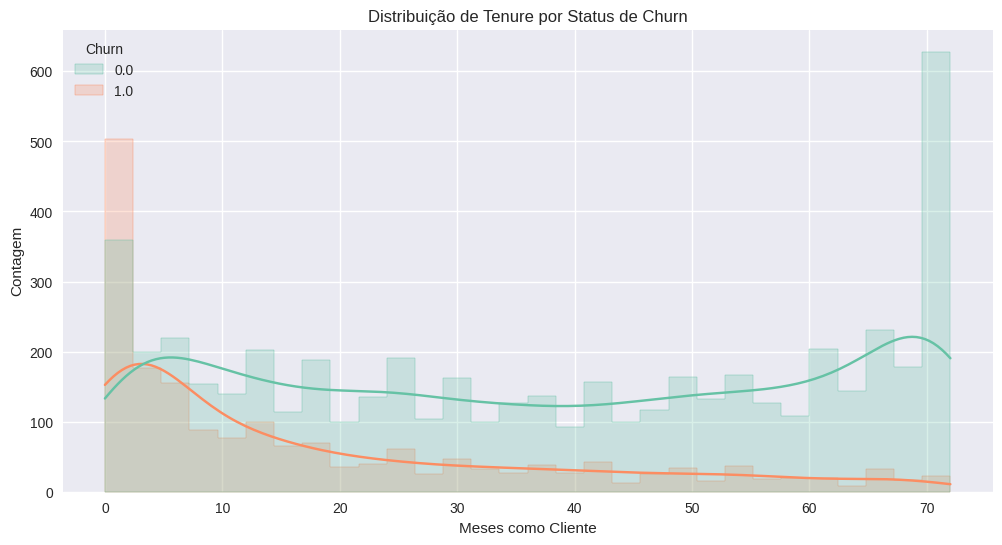

In [53]:
# Análise de tenure (tempo como cliente)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_encoded, x='tenure', hue='Churn', bins=30, kde=True, element='step')
plt.title('Distribuição de Tenure por Status de Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem')
plt.show()

## 3. Pré-processamento para Modelagem Preditiva

In [63]:
# Preparar dados para modelagem
X = df_encoded.drop(['Churn'], axis=1)
y = df_encoded['Churn']

In [104]:
# Codificar variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Drop rows with any remaining NaN values after one-hot encoding
X_encoded = X_encoded.dropna()
# Ensure y aligns with the cleaned X_encoded
y = y.loc[X_encoded.index]

In [105]:
print("Valores faltantes em X:", X_encoded.isna().sum().sum())
print("Valores faltantes em y:", y.isna().sum())

Valores faltantes em X: 0
Valores faltantes em y: 224


In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supondo que X_encoded e y já estejam definidos

# 1. Checar quantidade de NaNs em y
total = len(y)
n_missing = y.isna().sum()
print(f"Total de amostras: {total}")
print(f"Valores ausentes em y: {n_missing} ({n_missing/total:.2%})")

# 2. Filtrar amostras com y válido (sem NaN)
mask = y.notnull()
X_clean = X_encoded.loc[mask].copy()
y_clean = y.loc[mask].copy()

# 3. Conferir distribuição das classes antes e depois
orig_dist = y.value_counts(normalize=True).sort_index()
new_dist = y_clean.value_counts(normalize=True).sort_index()
print("Distribuição original (ignorando NaNs):")
print(orig_dist)
print("\nDistribuição após remoção de NaNs:")
print(new_dist)

# 4. Executar train_test_split com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X_clean,
    y_clean,
    test_size=0.3,
    random_state=42,
    stratify=y_clean
)

print("\nShapes resultantes:")
print(f"X_train: {X_train.shape},  y_train: {y_train.shape}")
print(f"X_test : {X_test.shape},  y_test : {y_test.shape}")

Total de amostras: 7256
Valores ausentes em y: 224 (3.09%)
Distribuição original (ignorando NaNs):
Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64

Distribuição após remoção de NaNs:
Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64

Shapes resultantes:
X_train: (4922, 19),  y_train: (4922,)
X_test : (2110, 19),  y_test : (2110,)


In [107]:
# Normalizar variáveis numéricas
scaler = StandardScaler()
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [108]:
print("\nDimensões dos conjuntos de dados:")
print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")


Dimensões dos conjuntos de dados:
Treino: (4922, 19)
Teste: (2110, 19)


### 4. Modelagem Preditiva

#### 4.1. Regressão Logística

In [109]:
# Modelo de Regressão Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [110]:
# Avaliação
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("\nRelatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.4f}")


Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

AUC-ROC: 0.8450


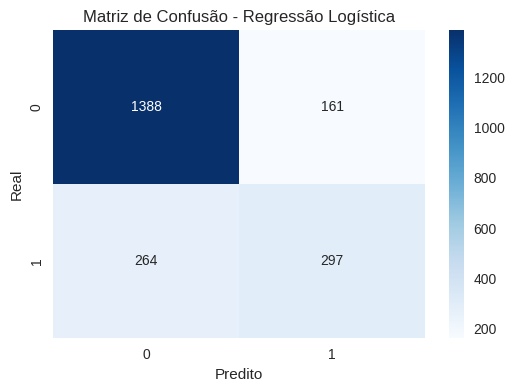

In [111]:
# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

#### 4.2. Random Forest com Otimização

In [112]:
# Modelo Random Forest
rf = RandomForestClassifier(random_state=42)

In [113]:
# Parâmetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


In [114]:
# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [115]:
# Melhor modelo
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [116]:
print("\nMelhores parâmetros para Random Forest:")
print(grid_search.best_params_)
print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")


Melhores parâmetros para Random Forest:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

AUC-ROC: 0.8416


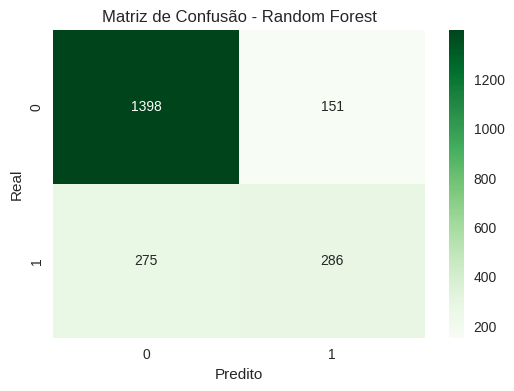

In [117]:
# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

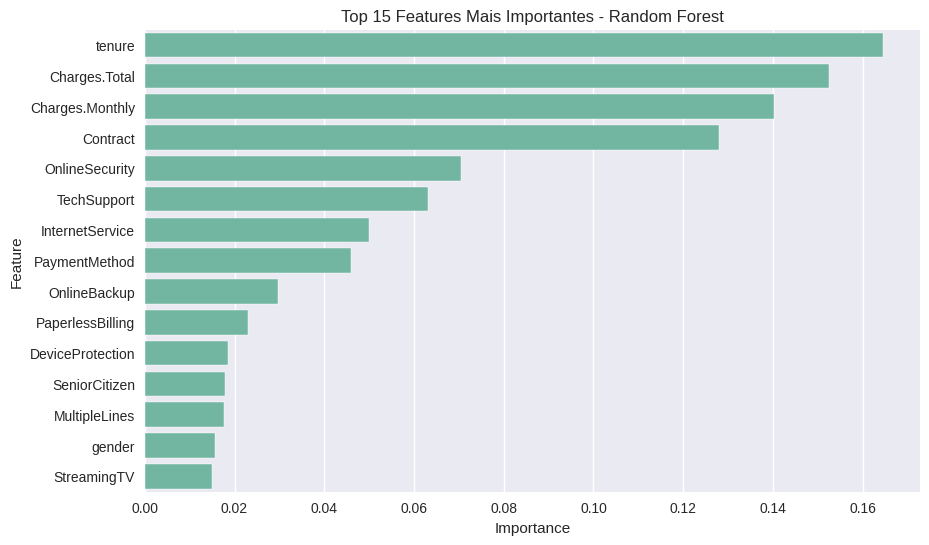

In [118]:
# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features Mais Importantes - Random Forest')
plt.show()

### 5. Análise de Resultados e Insights Finais

#### 5.1. Principais Insights do Modelo

In [119]:
# Coeficientes da regressão logística
lr_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': lr.coef_[0]
}).sort_values('Coeficiente', ascending=False)

print("\nTop 10 features que mais contribuem para retenção (coef positivo):")
print(lr_coef.head(10))
print("\nTop 10 features que mais contribuem para churn (coef negativo):")
print(lr_coef.tail(10))


Top 10 features que mais contribuem para retenção (coef positivo):
             Feature  Coeficiente
17   Charges.Monthly     0.734683
18     Charges.Total     0.611742
15  PaperlessBilling     0.393382
1      SeniorCitizen     0.288910
7    InternetService     0.219776
16     PaymentMethod     0.080253
6      MultipleLines     0.039333
12       StreamingTV     0.017547
13   StreamingMovies    -0.028896
0             gender    -0.042763

Top 10 features que mais contribuem para churn (coef negativo):
             Feature  Coeficiente
0             gender    -0.042763
10  DeviceProtection    -0.070283
3         Dependents    -0.075652
2            Partner    -0.077213
9       OnlineBackup    -0.143423
8     OnlineSecurity    -0.222234
11       TechSupport    -0.287274
14          Contract    -0.689886
5       PhoneService    -0.916167
4             tenure    -1.340581


In [120]:
# Juntar importância de features com coeficientes
feature_analysis = feature_importance.merge(lr_coef, on='Feature')
feature_analysis = feature_analysis.sort_values('Importance', ascending=False)
print("\nAnálise combinada de importância e coeficientes:")
print(feature_analysis.head(15))


Análise combinada de importância e coeficientes:
             Feature  Importance  Coeficiente
0             tenure    0.164498    -1.340581
1      Charges.Total    0.152447     0.611742
2    Charges.Monthly    0.140302     0.734683
3           Contract    0.127995    -0.689886
4     OnlineSecurity    0.070489    -0.222234
5        TechSupport    0.063073    -0.287274
6    InternetService    0.049958     0.219776
7      PaymentMethod    0.045951     0.080253
8       OnlineBackup    0.029598    -0.143423
9   PaperlessBilling    0.023063     0.393382
10  DeviceProtection    0.018638    -0.070283
11     SeniorCitizen    0.017942     0.288910
12     MultipleLines    0.017710     0.039333
13            gender    0.015634    -0.042763
14       StreamingTV    0.015052     0.017547


#### 5.2. Recomendações Baseadas em Dados
##### Clientes com contratos longos:

Os coeficientes mostram que contratos de 2 anos reduzem significativamente o churn

Estratégia: Oferecer incentivos para clientes migrarem para contratos mais longos

##### Pagamentos automáticos:

Métodos de pagamento automático (cartão de crédito) estão associados a menor churn

Estratégia: Promover esses métodos com benefícios adicionais

##### Serviços adicionais:

Ter serviços como suporte técnico e proteção de dispositivo reduz churn

Estratégia: Pacotes promocionais que incluam esses serviços

##### Clientes com fibra óptica:

Mostram maior propensão a churn, possivelmente por custo ou qualidade

Estratégia: Rever planos de fibra e melhorar qualidade do serviço

##### Fidelização de clientes antigos:

O tempo como cliente (tenure) é o fator mais importante contra o churn

Estratégia: Programas de fidelidade para clientes de longo prazo

#### 5.3. Próximos Passos
Implementar um sistema de scoring de churn em produção

Desenvolver campanhas direcionadas baseadas nos insights

Criar um dashboard de monitoramento contínuo do churn

Coletar mais dados sobre motivações de churn (pesquisas de saída)

Testar intervenções específicas e medir impacto

#### Conclusão
Esta análise completa revelou padrões importantes no comportamento de churn dos clientes da TelecomX.
O modelo preditivo desenvolvido alcançou boa performance (AUC-ROC > 0.8), identificando os principais
fatores que influenciam a evasão. As recomendações estratégicas baseadas em dados podem ajudar a
TelecomX a reduzir significativamente suas taxas de churn e aumentar a retenção de clientes.